In [2]:
import requests
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# The default limit is 100 rows. 
# how to know the upper limit 
# code it such that all the rows are extracted. &limit=50000
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=a41ce851-728e-4d65-8dc5-e0515a01ff31&limit=70000'

data = requests.get(url).text
final = json.loads(data)['result']['records']

df = pd.DataFrame(final)

In [4]:
df.columns
df.describe()


,_id
count,68136.000000
mean,34068.500000
std,19669.313308
min,1.000000
25%,17034.750000
50%,34068.500000
75%,51102.250000
max,68136.000000


Understand how many people have registered as property agents.

    registration_start_yr  salesperson_name
0                    2011             10582
1                    2012              1912
2                    2013              3192
3                    2014              2476
4                    2015              2862
5                    2016              2864
6                    2017              5256
7                    2018              6110
8                    2019              7294
9                    2020              6508
10                   2021             10434
11                   2022              8644
12                   2023                 2


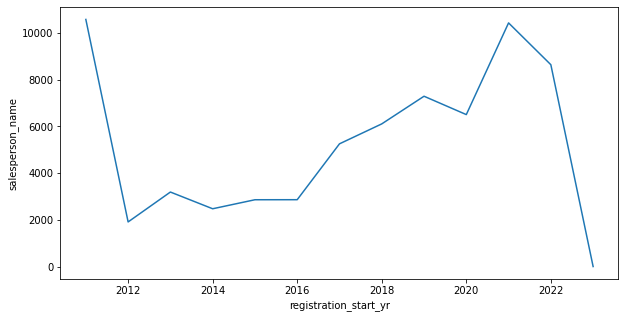

   registration_end_yr  salesperson_name
0                 2022             68134
1                 2024                 2


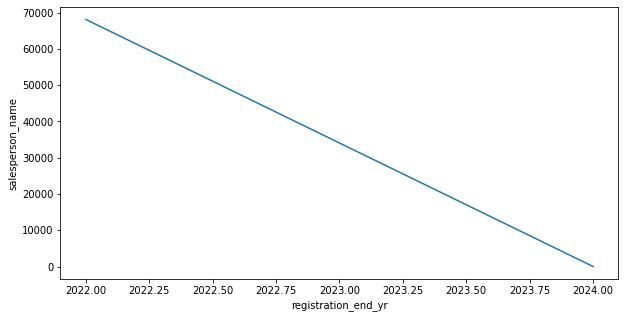

In [5]:
# convert the registeration_start_date into datetime format.
for origin_col_name, derived_col_name in zip(('registration_start_date', 'registration_end_date'),('registration_start_yr', 'registration_end_yr')):
    df[origin_col_name] = pd.to_datetime(df[origin_col_name])
    df[derived_col_name] = df[origin_col_name].dt.year
    df_grouped = df.groupby(derived_col_name, as_index=False)['salesperson_name'].count() # it's a series object. 
    # Convert the groupy from a series to dataframe. 
    print(df_grouped)
    plt.figure(figsize=(10,5))
    sns.lineplot(x=derived_col_name, y='salesperson_name', data = df_grouped)
    plt.show()



# EDA 1 : how many agents 


Total no: of Estate agencies: 1136


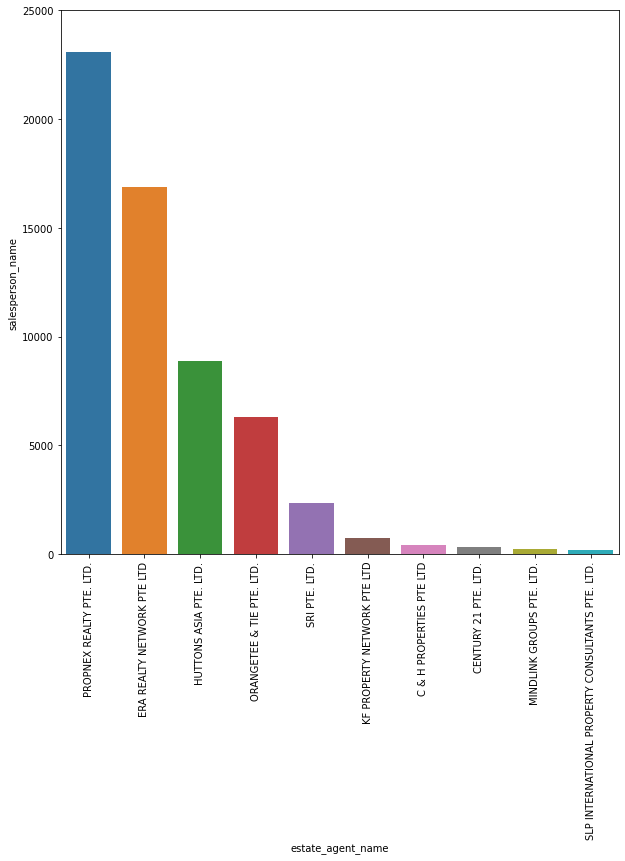

In [6]:
df_grouped = df.groupby('estate_agent_name', as_index=False)['salesperson_name'].count() # it's a series object. 
df_grouped = df_grouped.sort_values(by='salesperson_name', ascending=False)
print('Total no: of Estate agencies:', len(df_grouped))
df_grouped = df_grouped.head(10)

# 80% of the agents are in the top 5 agencies. 
# Histogram will be useful. 
#penguins = sns.load_dataset("df")
# difference b/w barplot and histplot. 
# Barplot: Plots the bars on the y axis. 
# Histplot: automatically groups and plots the count 
plt.figure(figsize=(10,10))

sns.barplot(data=df_grouped, x="estate_agent_name", y='salesperson_name')
plt.ylim(0,25000)
plt.xticks(rotation=90)
# sns.plt.xlim(0,)


plt.show()
